# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

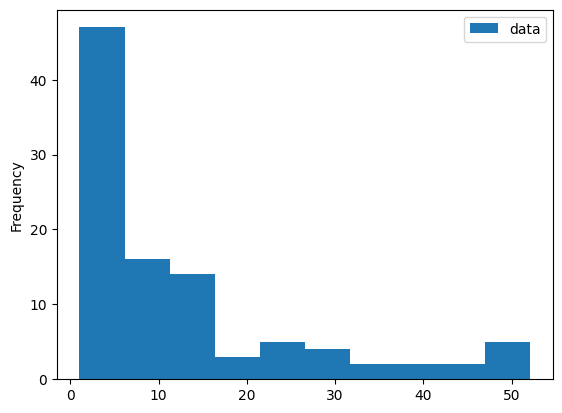

In [2]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

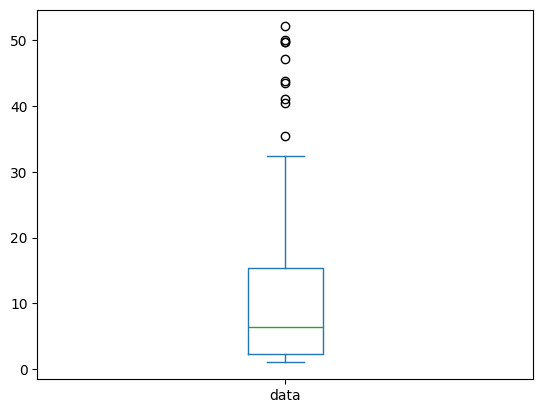

In [3]:
df.plot.box()

The histogram and box plot both make it possible to see the distribution of a feature

The histogram makes it easy to visualize the distribution. The reader can easily scan the bins to see which price ranges for the drug are most common, and what the low/high end prices are. The disadvantage of the histogram is you cannot easily identify metrics like the median or average price.

The boxplot also shows the distribution, but it additionally clearly displays what the outlier prices are. We can see the prices above 35 are outliers. It also shows the quartiles for the distributions, so we know the median is around 7, the upper quartile is around 15, and the lower quartile is around 3. It also shows the whiskers are around 2 and 35.

I would utilize the histogram for the administrator's inquiry. The histogram is easier to read for a business partner, and we can show given a the current price where it would fall on the distribution. I would add some additional detail like a title, X axis label, and if the user was interested in a metric like mean, we could add a line on the graph indicating where that falls.

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [4]:
import matplotlib.pyplot as plt

## Read Data

In [5]:
df = pd.read_csv("C:/Users/caleb/Downloads/ppploan/ppp_over_150k.csv")
df

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,TOTAL_PROCEED,PROCEED_Diff,UTILITIES_PROCEED_pct,PAYROLL_PROCEED_pct,MORTGAGE_INTEREST_PROCEED_pct,RENT_PROCEED_pct,REFINANCE_EIDL_PROCEED_pct,HEALTH_CARE_PROCEED_pct,DEBT_INTEREST_PROCEED_pct,PROCEED_Per_Job
0,9547507704,2020-05-01,464,PPP,sumter coatings inc,2410 highway 15 south,sumter,UNK,29150-9662,2020-12-18,...,769358.78,0.0,0.000,1.000,0.0,0.0,0.0,0.0,0.0,12409.01
1,9777677704,2020-05-01,464,PPP,pleasant places inc,7684 southrail road,north charleston,UNK,29420-9000,2021-09-28,...,736927.79,0.0,0.000,1.000,0.0,0.0,0.0,0.0,0.0,10094.90
2,5791407702,2020-05-01,1013,PPP,boyer childrens clinic,1850 boyer ave e,seattle,UNK,98112-2922,2021-03-17,...,691355.00,0.0,0.000,1.000,0.0,0.0,0.0,0.0,0.0,9218.07
3,6223567700,2020-05-01,920,PPP,kirtley construction inc,1661 martin ranch rd,san bernardino,UNK,92407-1740,2021-10-16,...,499871.00,0.0,0.000,1.000,0.0,0.0,0.0,0.0,0.0,23803.38
4,9662437702,2020-05-01,101,PPP,aero box llc,unknown,unknown,UNK,0,2021-08-17,...,367437.00,0.0,0.000,1.000,0.0,0.0,0.0,0.0,0.0,14697.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968527,4395967002,2020-04-03,897,PPP,roy e paulson jr pc,102 n kenwood,casper,WY,82601-2724,2021-01-13,...,150000.00,0.0,0.000,1.000,0.0,0.0,0.0,0.0,0.0,10000.00
968528,6985647108,2020-04-14,897,PPP,sweetwater county child developmental center inc,1715 hitching post dr,green river,WY,82935-5783,2020-12-08,...,150000.00,0.0,0.033,0.967,0.0,0.0,0.0,0.0,0.0,3452.38
968529,7996438405,2021-02-12,897,PPS,electrical systems of wyoming inc,1105 adon rd,rozet,WY,82727-8465,2021-09-15,...,149998.00,2.0,0.000,1.000,0.0,0.0,0.0,0.0,0.0,29999.40
968530,9054647103,2020-04-15,897,PPP,eden life care,30 n gould street ste 4000,sheridan,WY,82801,2022-03-08,...,150000.00,0.0,0.000,1.000,0.0,0.0,0.0,0.0,0.0,21428.57


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968532 entries, 0 to 968531
Data columns (total 66 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   LoanNumber                     968532 non-null  int64  
 1   DateApproved                   968532 non-null  object 
 2   SBAOfficeCode                  968532 non-null  int64  
 3   ProcessingMethod               968532 non-null  object 
 4   BorrowerName                   968525 non-null  object 
 5   BorrowerAddress                968532 non-null  object 
 6   BorrowerCity                   968532 non-null  object 
 7   BorrowerState                  968532 non-null  object 
 8   BorrowerZip                    968532 non-null  object 
 9   LoanStatusDate                 968532 non-null  object 
 10  LoanStatus                     968532 non-null  object 
 11  Term                           968532 non-null  int64  
 12  SBAGuarantyPercentage         

In [7]:
numeric_df = df.select_dtypes(include=[np.number])

# Find rows where ANY column has an infinite value
rows_with_inf = df[np.isinf(numeric_df).any(axis=1)]
rows_with_inf

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,TOTAL_PROCEED,PROCEED_Diff,UTILITIES_PROCEED_pct,PAYROLL_PROCEED_pct,MORTGAGE_INTEREST_PROCEED_pct,RENT_PROCEED_pct,REFINANCE_EIDL_PROCEED_pct,HEALTH_CARE_PROCEED_pct,DEBT_INTEREST_PROCEED_pct,PROCEED_Per_Job
123812,6557167306,2020-04-30,914,PPP,st margaret mary school,25515 eshelman,lomita,CA,90717,2021-10-21,...,223364.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,inf
550932,5780187005,2020-04-06,766,PPP,reliant transportation inc,4411 s 86th street,lincoln,NE,68526-9225,2021-03-11,...,594600.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,inf
763783,4864227203,2020-04-27,303,PPP,vincera rehab llc,1200 constitution ave ste 210,philadelphia,PA,19112-1306,2021-04-14,...,212300.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,inf
967206,4563247009,2020-04-03,897,PPP,weeden construction llc,402 murphy gulch rd,banner,WY,82832-9726,2020-12-15,...,350000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,inf


In [8]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [9]:
fraud_df = pd.read_csv("C:/Users/caleb/Downloads/ppploan/ppp_fraud_cases.csv")
fraud_df

,Company,State,Source,Suspects
0,apollo hp inc,CA,https://www.justice.gov/usao-edca/pr/rocklin-b...,"[['Kevin Lee Co', 'CA']]"
1,power house sports academy,GA,https://www.justice.gov/opa/pr/six-charged-con...,"[['Rodericque Thompson', 'GA'], ['Micah K Bais..."
2,faithful transport services llc,SC,https://www.justice.gov/opa/pr/six-charged-con...,"[['Rodericque Thompson', 'GA'], ['Travis C Cro..."
3,kmj transport llc,SC,https://www.justice.gov/opa/pr/six-charged-con...,"[['Rodericque Thompson', 'GA'], ['Keith A Malo..."
4,market yourself inc,GA,https://www.justice.gov/opa/pr/six-charged-con...,"[['Rodericque Thompson', 'GA'], ['Tabronx W Sm..."
...,...,...,...,...
95,pink lady line,TX,https://www.justice.gov/usao-sdtx/pr/local-wom...,"[['LaDonna Wiggins', 'TX']]"
96,guardian of humanity inc,AZ,https://www.justice.gov/usao-wdny/pr/north-chi...,"[['Michael Rech', 'NY']]"
97,skilled trade investments lp,TX,https://www.justice.gov/opa/pr/texas-man-arres...,"[['Scott Jackson Davis', 'TX']]"
98,skilled trade staffing llc,TX,https://www.justice.gov/opa/pr/texas-man-arres...,"[['Scott Jackson Davis', 'TX']]"


In [10]:
df['Fraud'] = df['BorrowerName'].isin(fraud_df['Company']).astype(int)

In [11]:
# We only see 83 of the 100 fraudulent companies...
len(fraud_df['Company'].unique())

100

In [12]:
len(df[df['Fraud'] == 1]['BorrowerName'].unique())

83

In [13]:
len(set(df[df['Fraud'] == 1]['BorrowerName'].unique()))

83

In [14]:
len(set(fraud_df['Company'].unique()))

100

In [15]:
not_found_fraudulent_companies = set(
    fraud_df['Company'].unique()
).difference(set(
    df[df['Fraud'] == 1]['BorrowerName'].unique()
))
not_found_fraudulent_companies

{'aboveall business',
 'all star room and board services of michigan inc',
 'blue flight logistics llc',
 'dituri construction llc',
 'eni operation co',
 'eric r shibley md pllc',
 'es1 llc',
 'maturino enterprises',
 'nkb enterprise llc',
 'pinnacle industry inc',
 'seattles finest cannabis llc',
 'sfc llc',
 'showtime trucking xpo inc',
 'ss1 llc',
 'velocity innovations',
 'visla captial llc',
 'wingate funeral service group'}

In [16]:
# Transforming the company names to make the search less stringent. We may be able to manually label by doing this
companies = [
    'aboveall',
    'all star room',
    'blue flight',
    'dituri',
    'eni operation',
    'shibley',
    'es1',
    'maturino',
    'nkb enterprise',
    'pinnacle industry',
    'seattles finest cannabis',
    'sfc',
    'showtime trucking ',
    'ss1',
    'velocity',
    'visla captial ',
    'wingate funeral'
]
for c in companies:
    print(f"{c}: {df['BorrowerName'].str.contains(c).any()}")
    print(df[df['BorrowerName'].str.contains(c, na=False)]['BorrowerName'])
    print('\n')

aboveall: False
Series([], Name: BorrowerName, dtype: object)


all star room: True
454316    all star room  board services of michigan inc
Name: BorrowerName, dtype: object


blue flight: False
Series([], Name: BorrowerName, dtype: object)


dituri: True
588733    drs gardiner  dituri pasba small 7a term
Name: BorrowerName, dtype: object


eni operation: False
Series([], Name: BorrowerName, dtype: object)


shibley: True
371855                  shibleyville llc
373694                  shibleyville llc
623978          shibley operating co llc
623979          shibley operating co llc
680901            shibley management inc
684010            shibley management inc
692598    spangenberg shibley  liber llp
692680    spangenberg shibley  liber llp
Name: BorrowerName, dtype: object


es1: True
25546     connie a hottmann dba gampg enterprises1
85495                               pawsibilities1
107014                          pawsibilities1 inc
697585                   gc aviation services1 

The following numeric columns should not be used for modeling:
- Loan Number (ID)
- SBAOfficeCode (ID, though maybe it matters if certain locations are approving all fraudulent loans)
- SBAGuarantyPercentage(Always value 100)
- UndisbursedAmount (Always value 0)
- ServicingLenderLocationID (ID)
- NAICSCode (ID)
- OriginatingLenderLocationID (ID)

The following column have numeric dtype but are categorical
- Term

The following non-numeric columns should not be used for modeling:
- BorrowerAddress (Random string)
- BorrowerCity (? Need to evaluate if location should be used)
- BorrowerName (Random string)
- BorrowerState (?)
- BorrowerZip (?)
- CD (? Project congressional district)
- Ethnicity (Bias)
- FranchiseName (random str)
- Gender (Bias)
- OriginatingLender (Random str)
- OriginatingLenderCity (?)
- OriginatingLenderState (?)
- ProjectCity (?)
- ProjectCountyName (?)
- ProjectState (?)
- ProjectZip (?)
- Race (bias)
- ServicingLenderAddress (random str)
- ServicingLenderCity (?)
- ServicingLenderName (?)
- ServicingLenderState (?)
- ServicingLenderZip (?)

Non numeric cols for modeling
- BusinessType (categorical)
- BusinessAgeDescription (categorical)
- DateApproved (datetime, maybe convert to int)
- ForgivenessDate (datetime, maybe convert to int)
- HubzoneIndicator (categorical)
- LMIndicator (categorical)
- LoanStatus (categorical)
- LoanStatusDate (datetime, maybe convert to int)
- NonProfit (categorical)
- ProcessingMethod (categorical)
- RuralUrbanIndicator (categorical)
- Veteran (categorical)


In [17]:
numeric_cols_to_drop = [
    'LoanNumber',
    'SBAOfficeCode',
    'SBAGuarantyPercentage',
    'UndisbursedAmount',
    'ServicingLenderLocationID',
    'NAICSCode',
    'OriginatingLenderLocationID',
]

In [18]:
non_numeric_cols_to_drop = [
    'BorrowerAddress',
    'BorrowerCity',
    'BorrowerName',
    'BorrowerState',
    'BorrowerZip',
    'CD',
    'Ethnicity',
    'FranchiseName',
    'Gender',
    'OriginatingLender',
    'OriginatingLenderCity',
    'OriginatingLenderState',
    'ProjectCity',
    'ProjectCountyName',
    'ProjectState',
    'ProjectZip',
    'Race',
    'ServicingLenderAddress',
    'ServicingLenderCity',
    'ServicingLenderName',
    'ServicingLenderState',
    'ServicingLenderZip',
]

In [19]:
columns_to_drop = set(numeric_cols_to_drop).union(set(non_numeric_cols_to_drop))
df = df.drop(columns_to_drop, axis=1)

In [20]:
numeric_cols = df.select_dtypes(include='number').columns
non_numeric_cols = df.columns.difference(numeric_cols)

## Histograms

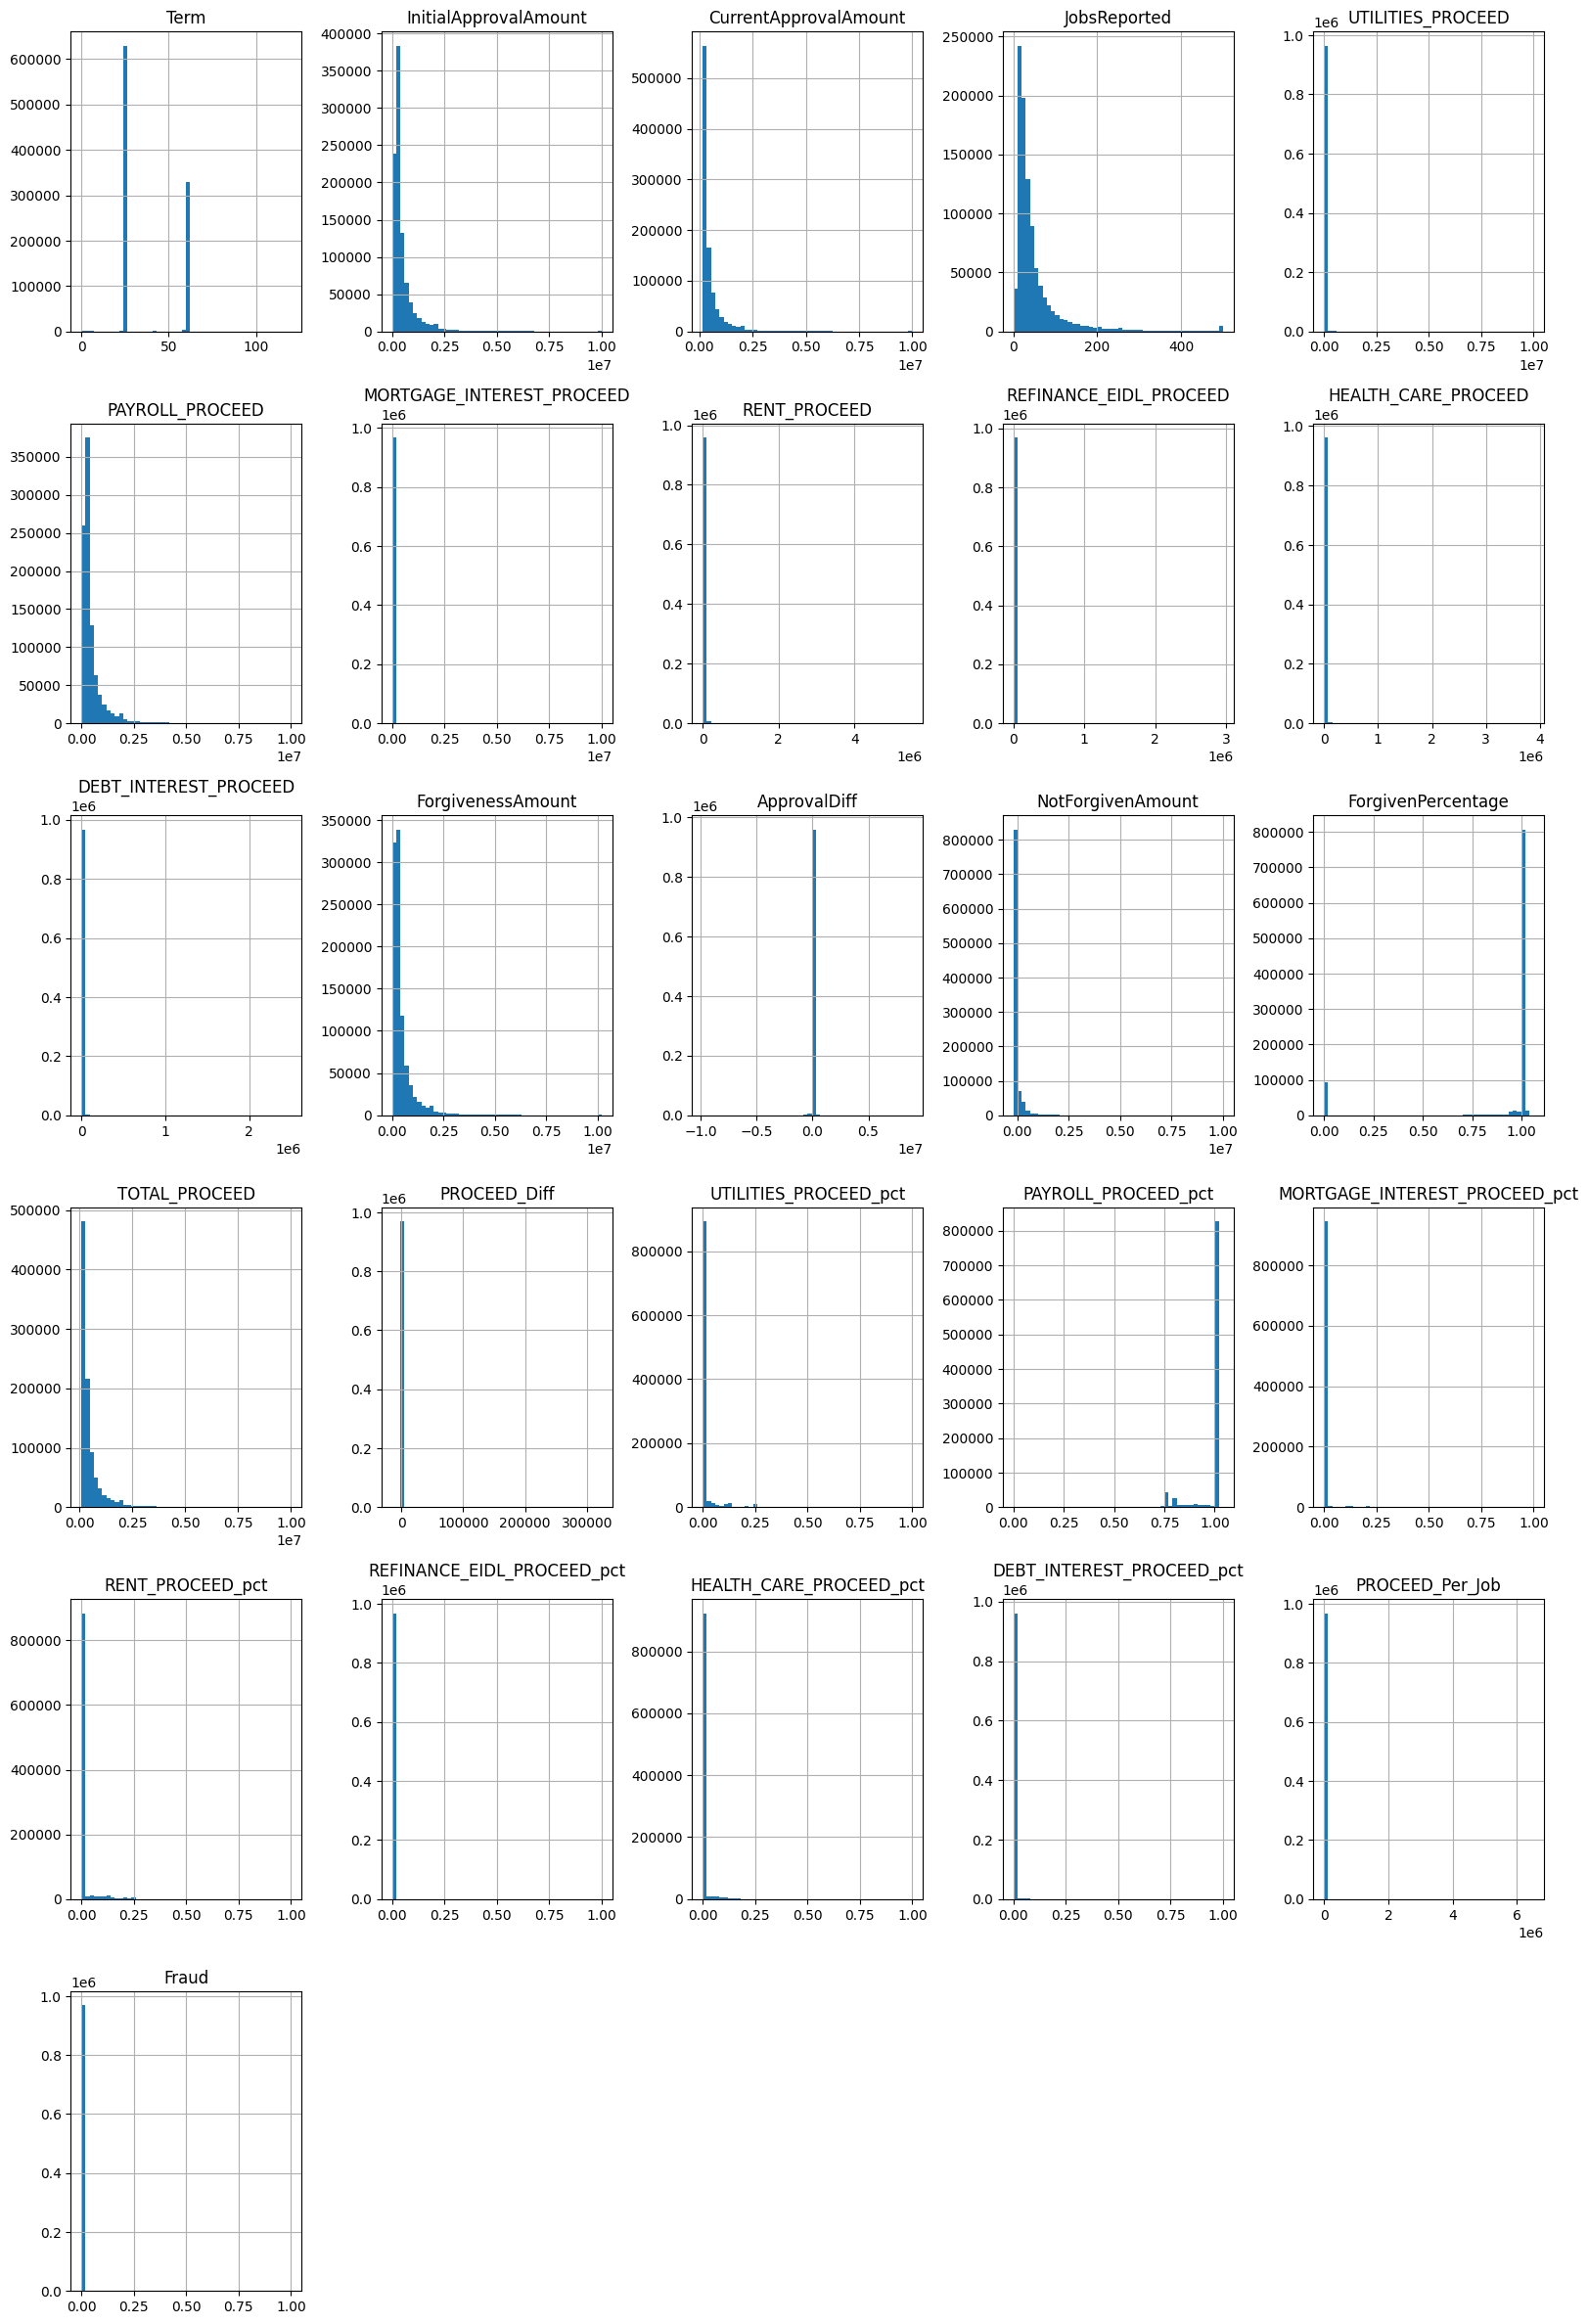

In [21]:
df[numeric_cols].hist(column=numeric_cols, figsize=(16, 24), bins=50)
plt.tight_layout()
None

## Violin Plots

c:\Users\caleb\anaconda3\envs\iris-fisher\lib\site-packages\numpy\linalg\_linalg.py:2383: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


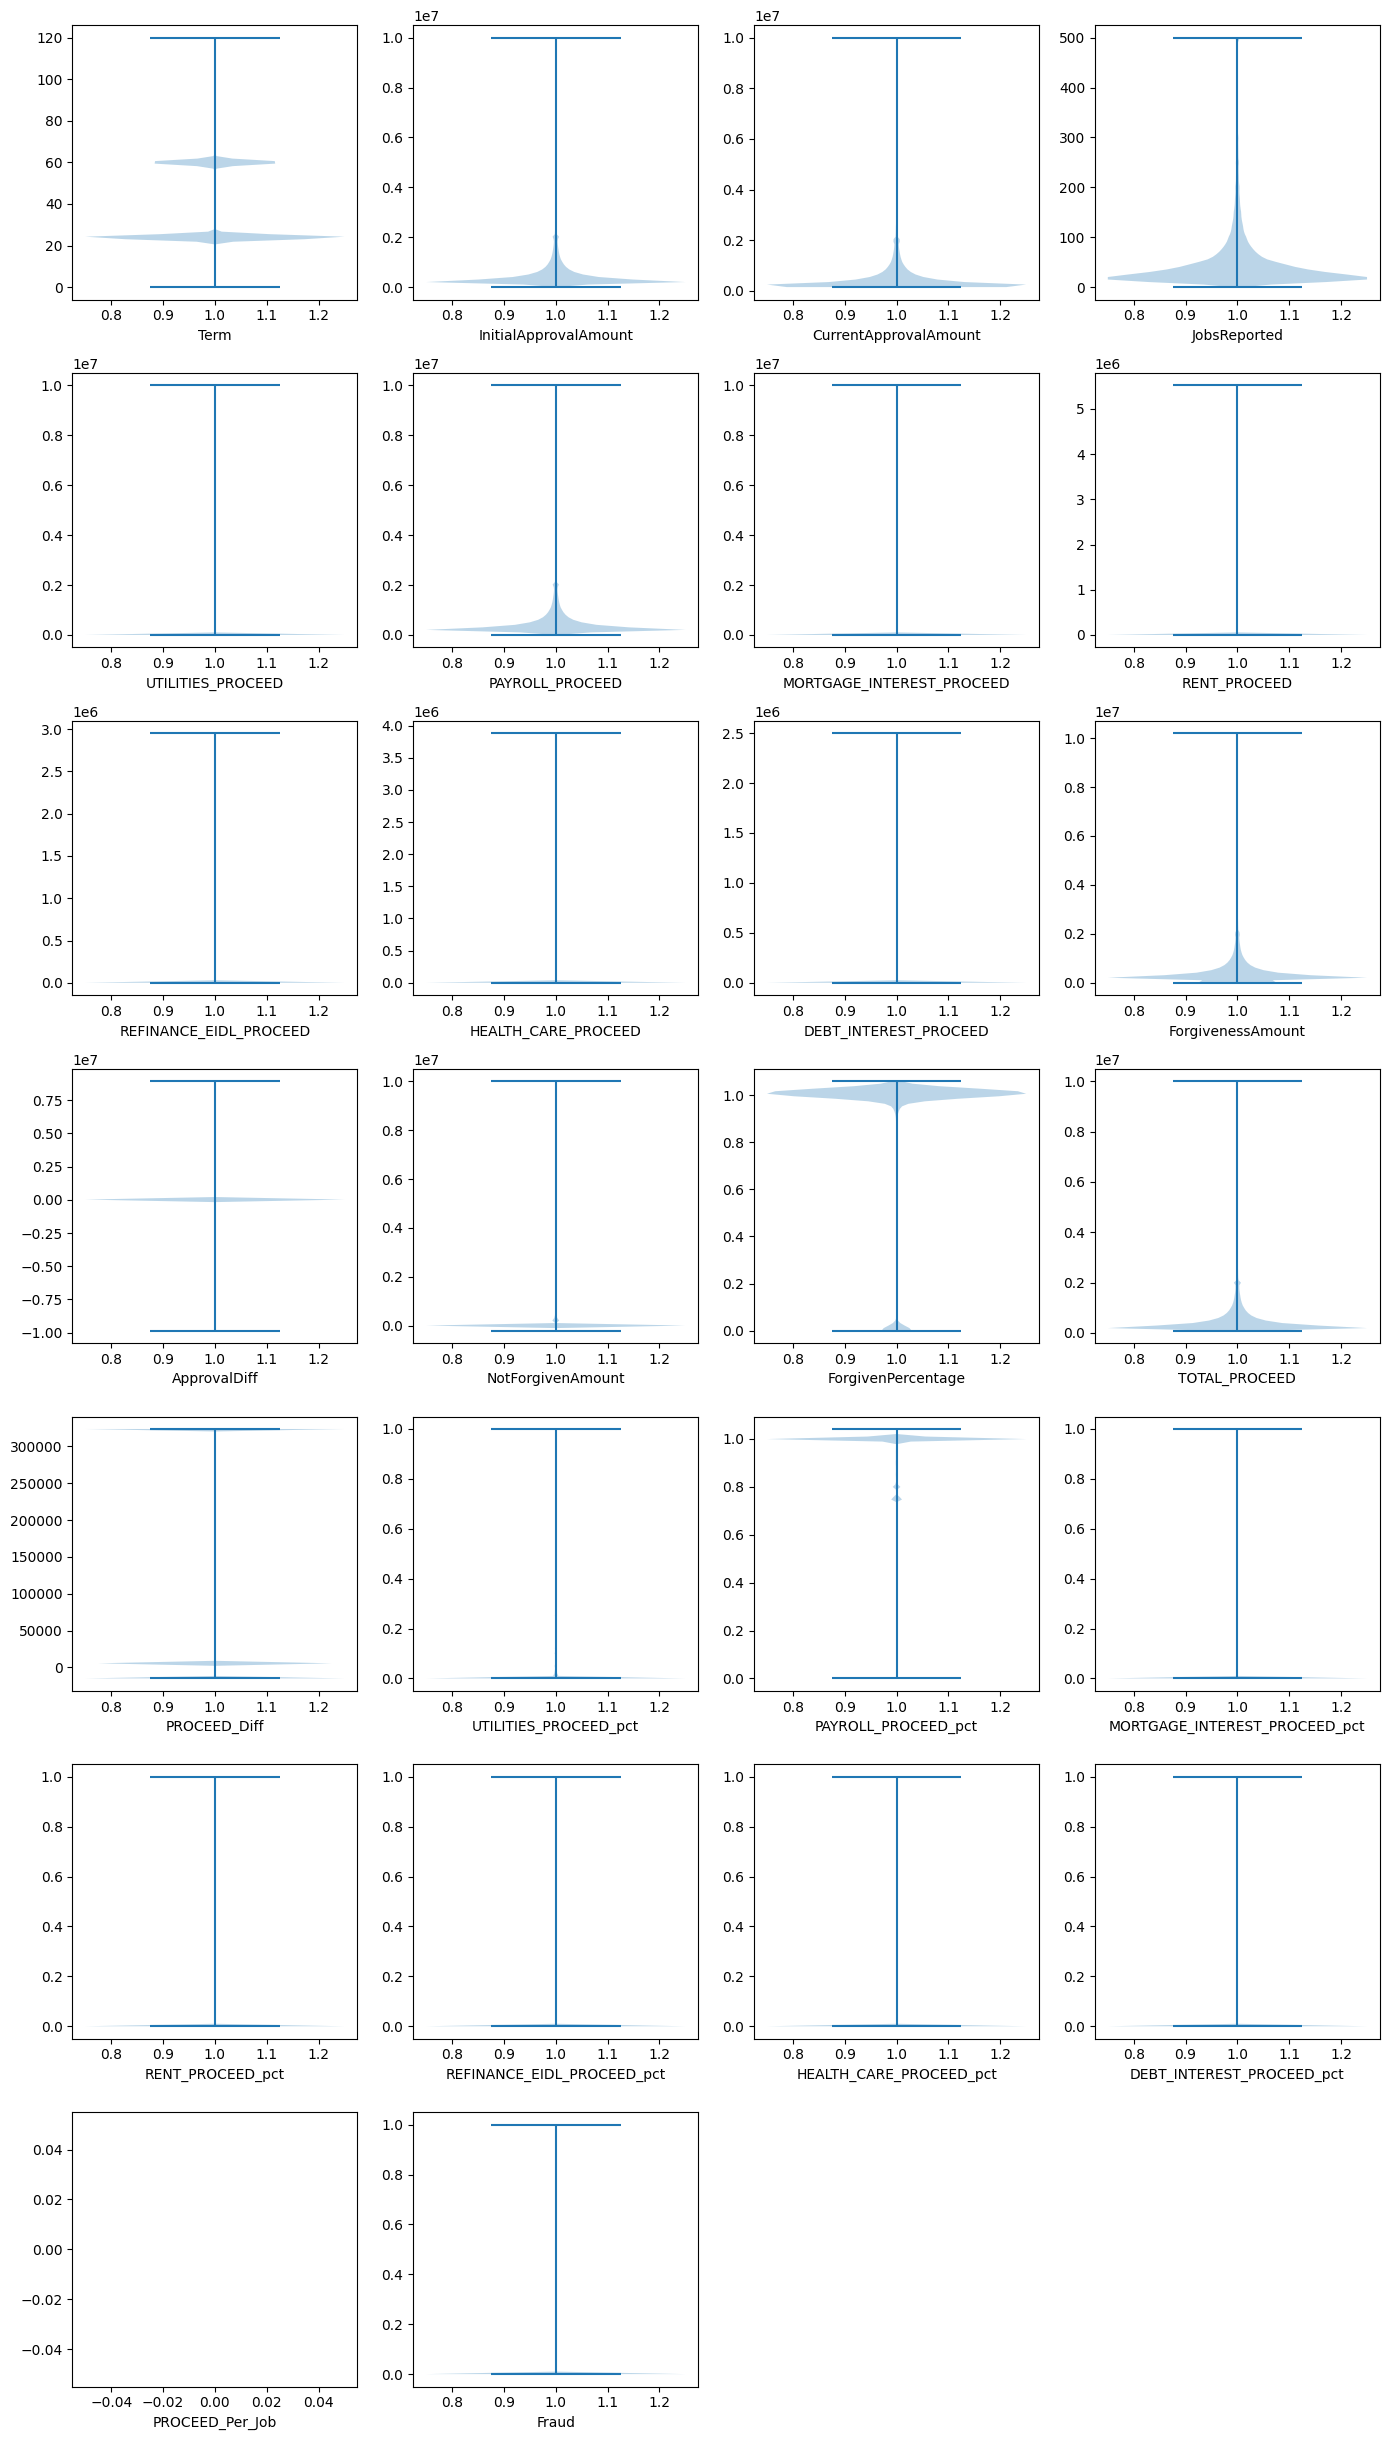

In [22]:
num_cols = 4
num_rows = (len(numeric_cols) + num_cols - 1) // num_cols
plt.figure(figsize=(num_cols * 3.5, num_rows * 3.5))
for (i,c) in enumerate(numeric_cols):
    plt.subplot(num_rows, num_cols, i+1)
    plt.violinplot(df[c])
    plt.xlabel(c)
plt.tight_layout()
None

## Boxplots

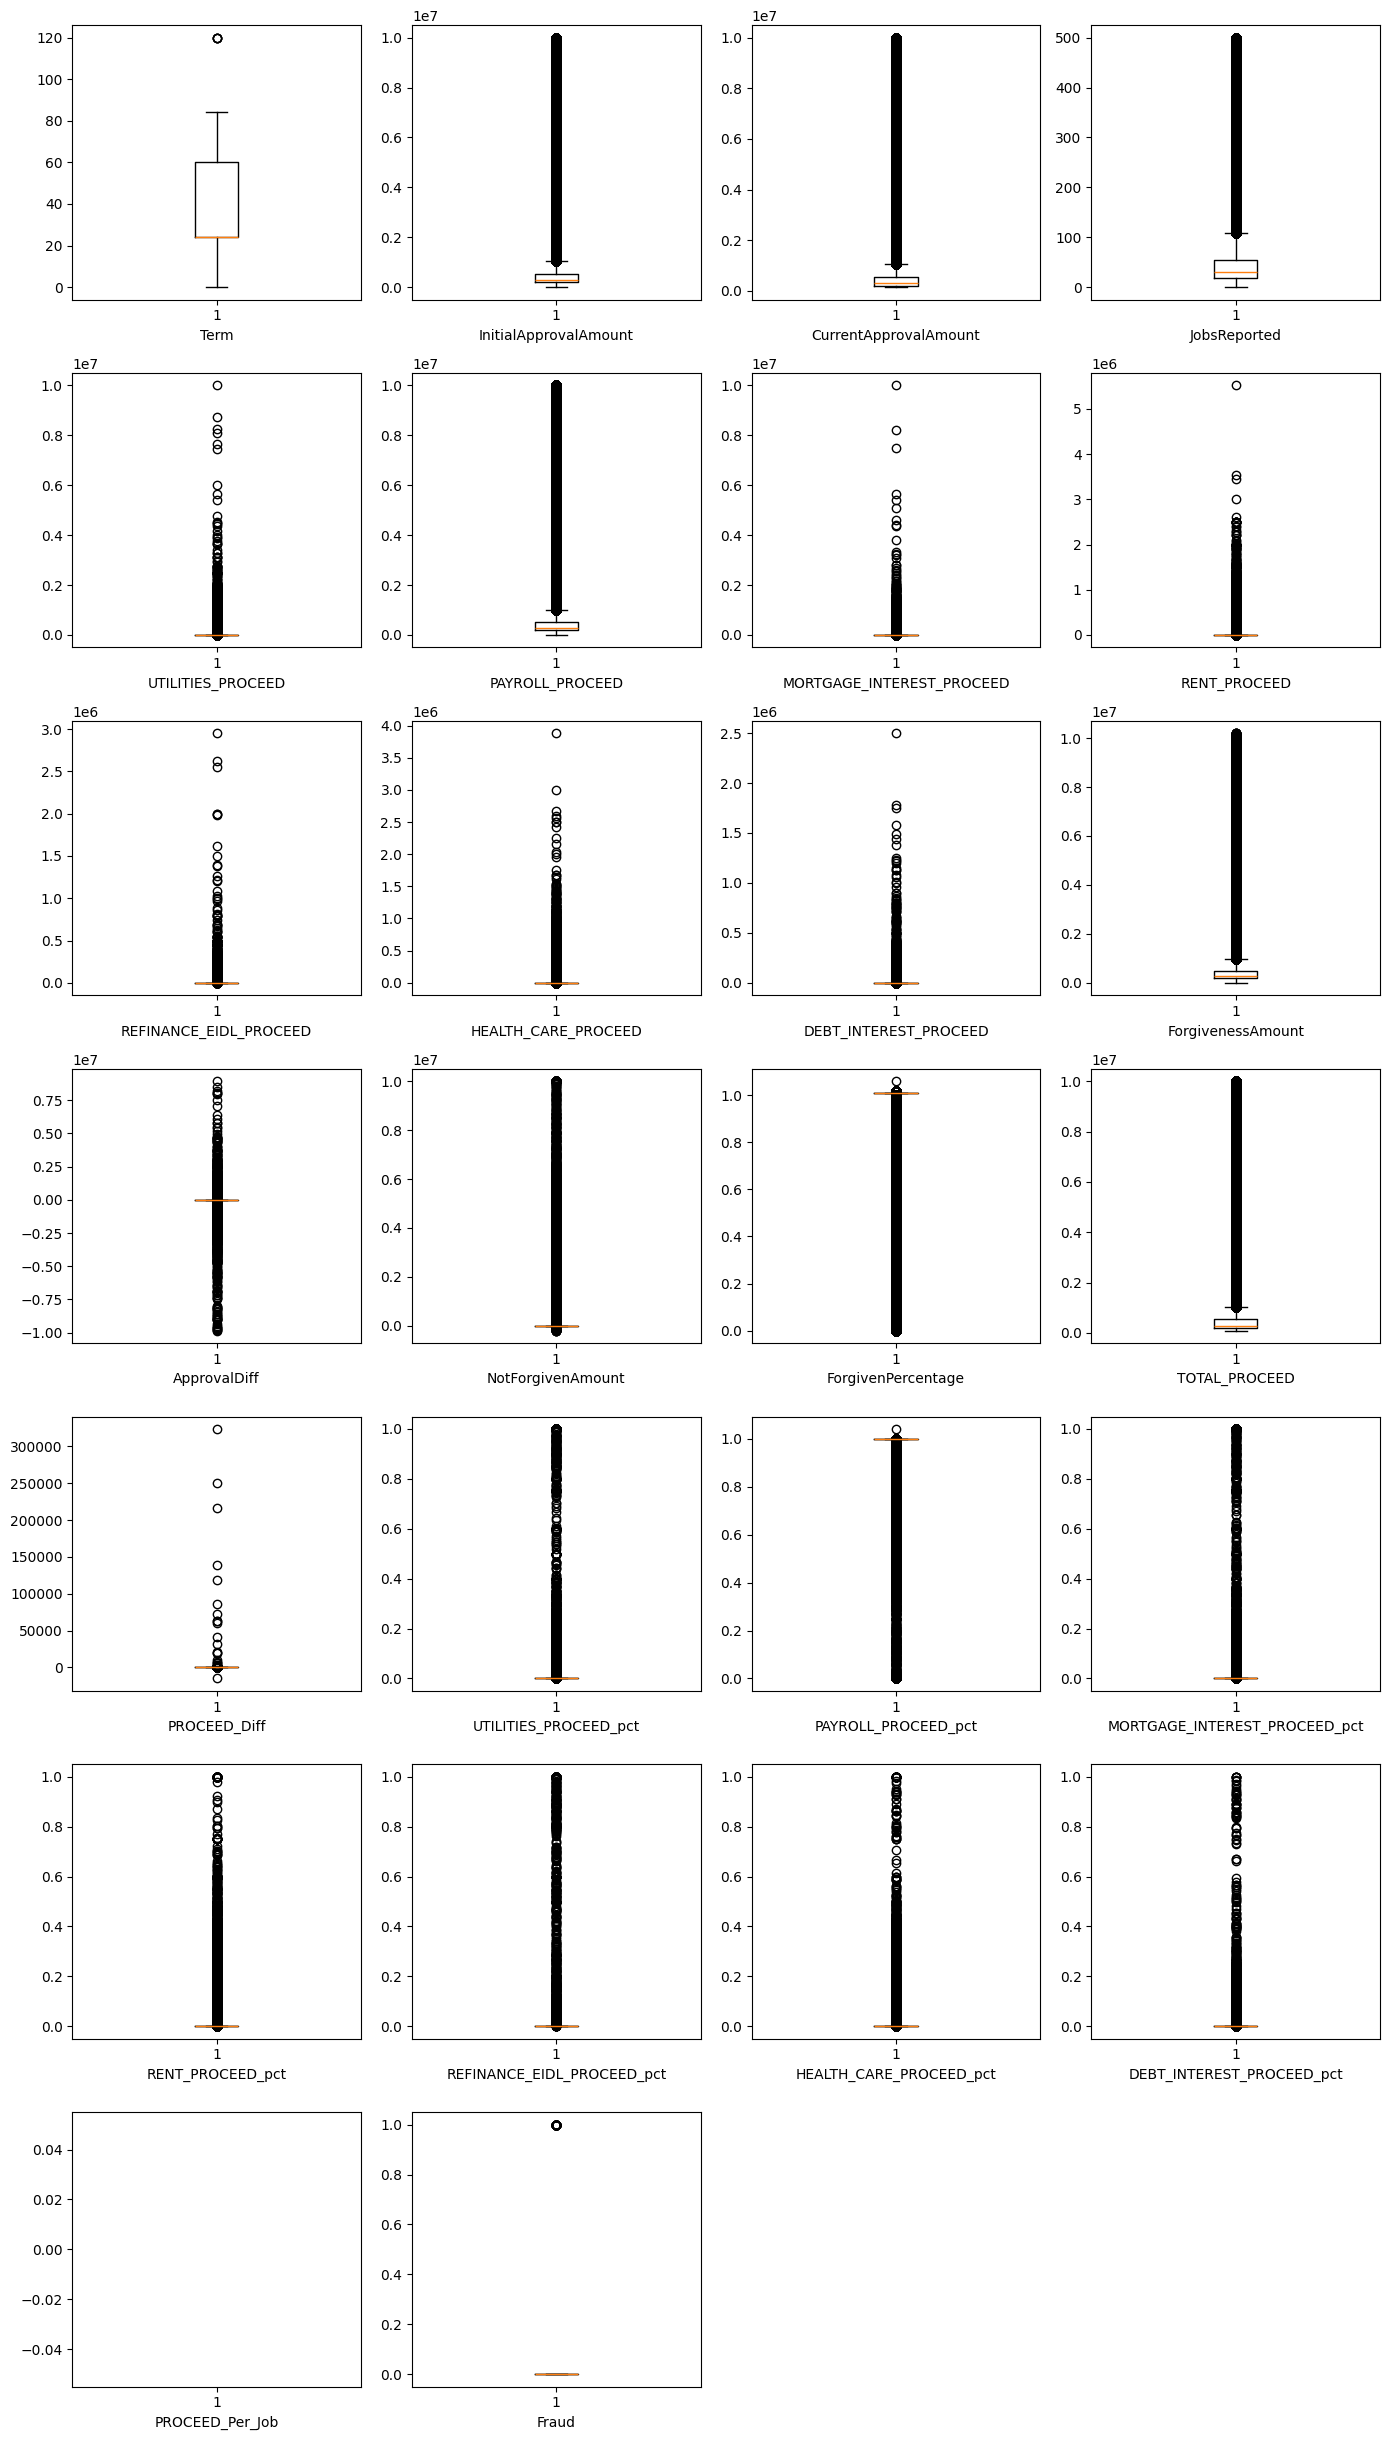

In [23]:
num_cols = 4
num_rows = (len(numeric_cols) + num_cols - 1) // num_cols
plt.figure(figsize=(num_cols * 3.5, num_rows * 3.5))
for (i,c) in enumerate(numeric_cols):
    plt.subplot(num_rows, num_cols, i+1)
    plt.boxplot(df[c])
    plt.xlabel(c)
plt.tight_layout()
None

## Plotting Categorical Columns

In [24]:
categorical_cols = [c for c in non_numeric_cols if df[c].nunique() <= 20]

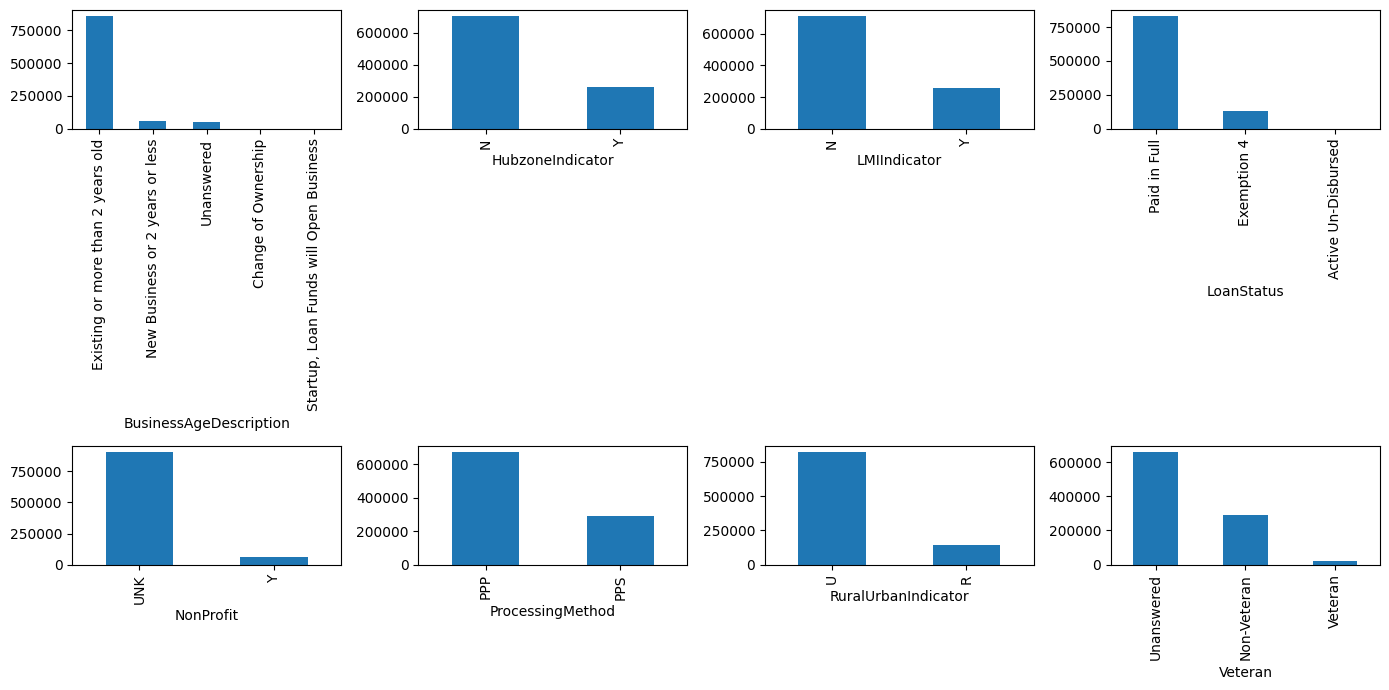

In [25]:
num_cols = 4
num_rows = (len(categorical_cols) + num_cols - 1) // num_cols
plt.figure(figsize=(num_cols * 3.5, num_rows * 3.5))
for (i,c) in enumerate(categorical_cols):
    plt.subplot(num_rows, num_cols, i+1)
    df[c].value_counts().plot(kind='bar')
    plt.xlabel(c)
plt.tight_layout()
None

## Conclusions

The dataset has a large number of instances (over 900,000) and features (66). The features are a mix of categorical and numeric. There are also some string features such as names or street addresses, which will not be useful for modeling. There are also a number of protected features including gender and race, which could produce biased models.

Some numeric features like the amounts and proceeds have a skewed distribution. There are a number of binary numeric features which are bimodal

Based on the boxplots, there are outliers for almost every numeric feature. This is not surprising since there are almost 1,000,000 instances in the dataset


# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.